SIMPLE DATA CLEANING

AND

DATA VISUALIZATION: using matplotlib and seaborn

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import sklearn

In [56]:
df=pd.read_csv('./data/Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [58]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [59]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [60]:
df.set_index('Person ID',inplace=True)
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [61]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [62]:
df['Sleep Disorder']=df['Sleep Disorder'].fillna('None')
df['Sleep Disorder']

Person ID
1             None
2             None
3             None
4      Sleep Apnea
5      Sleep Apnea
          ...     
370    Sleep Apnea
371    Sleep Apnea
372    Sleep Apnea
373    Sleep Apnea
374    Sleep Apnea
Name: Sleep Disorder, Length: 374, dtype: object

In [63]:
df['Sleep Disorder']=df['Sleep Disorder'].fillna('None')
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [64]:
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

DATA VISUALIZATION


In [65]:
def plot_bar_chart(df, column_name,top_values=None,hue=None,palette='viridis',show_grid=True, figsize=(10,6),bar_font_size=14,bar_angle=45,angle=85):
    #set up fig
    fig, ax = plt.subplots(figsize=figsize)

    #Get calue counts and filter if top value is specified
    counts=df[column_name].value_counts()
    if top_values:
        counts=counts.iloc[:top_values]

    #plot the bar chart
    sns.barplot(x=counts.index, y=counts.values, palette=hue, ax=ax)

    #Add labels to each bar
    for i, value in enumerate(counts.values):
        ax.text(i,value+0.05,f'{value}',ha='center',fontsize=bar_font_size, rotation =bar_angle)

    #Customize the plot
    ax.set_title(f"{column_name} Distribution", fontsize=20, fontweight='bold')
    ax.set_xlabel(column_name, fontsize=16)
    ax.set_ylabel("count",fontsize=14)
    plt.xticks(rotation=85, fontsize=14)
    if show_grid:
        plt.grid(axis='y', linestyle='--',alpha=0.7)

    plt.show()

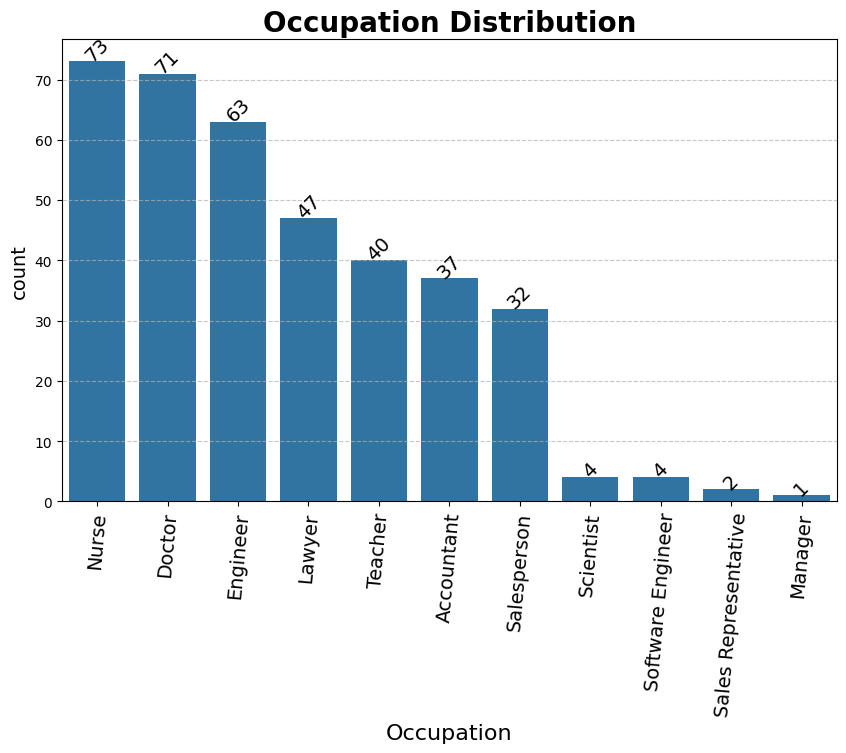

In [133]:
plot_bar_chart(df, 'Occupation', top_values=30,figsize=(10, 6), 
                   palette='Set3')

In [67]:
df['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

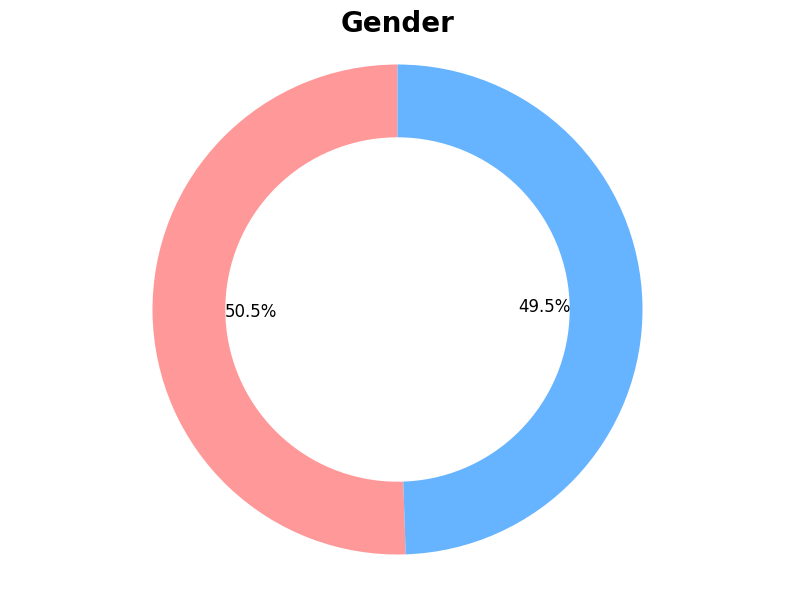

In [68]:
def plot_donut_chart(df1, column_name, title='Donut Chart', hole_size=0.7, figsize=(10, 7), colors=None):
    # Count occurrences of each unique value in the specified column
    counts = df1[column_name].value_counts()

    # Extract data and labels
    data = counts.values.tolist()  # Counts
    labels = counts.index.tolist()  # Unique values

    # Calculate total and percentages
    total = sum(data)
    percentages = [count / total * 100 for count in data]  # Calculate percentages

    # Create the donut chart
    fig, ax = plt.subplots(figsize=figsize)
    wedges, texts, autotexts = ax.pie(data, labels=None,colors=colors, autopct='%1.1f%%', startangle=90)

    # Draw the center circle to create the donut effect
    centre_circle = plt.Circle((0, 0), hole_size, color="white")
    fig.gca().add_artist(centre_circle)

    # Equal aspect ratio ensures the pie chart is circular
    ax.axis('equal')
    plt.title(title, fontsize=20, fontweight='bold')

    # Adjust the size of the text labels and show percentages
    for i, text in enumerate(autotexts):
        text.set_size(12)  # Set font size for percentage labels
        text.set_text(f'{percentages[i]:.1f}%')  # Update text to show percentage

    plt.show()

#
# Call the donut chart function
colors = ['#ff9999', '#66b3ff']  # Define colors for each wedge
plot_donut_chart(df, 'Gender', title='Gender', colors=colors)

PIECHART


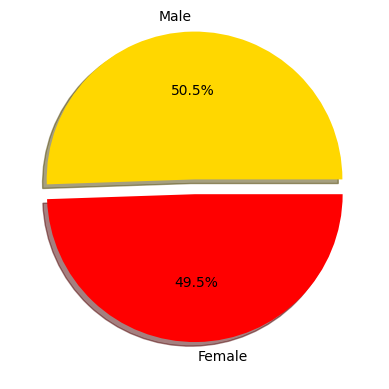

In [69]:
counts = df['Gender'].value_counts()

    # Extract data and labels
sizes = counts.values.tolist()  
labels = counts.index.tolist()  
colors=['gold','red']
explode=(0.1,0)
plt.pie(sizes,labels=labels,explode=explode,colors=colors,autopct="%1.1f%%",shadow=True)

plt.show()

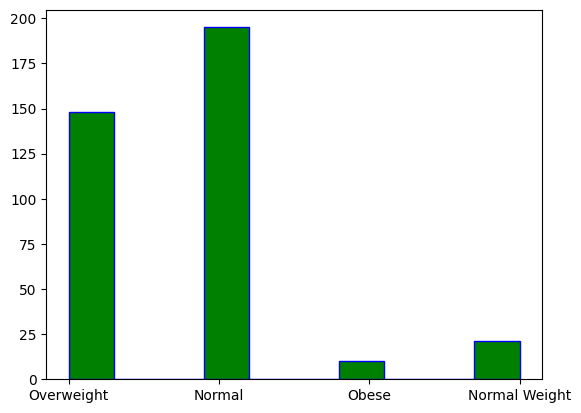

In [70]:
#create a histogram
plt.hist(df['BMI Category'], bins=10,color='green',edgecolor='blue');

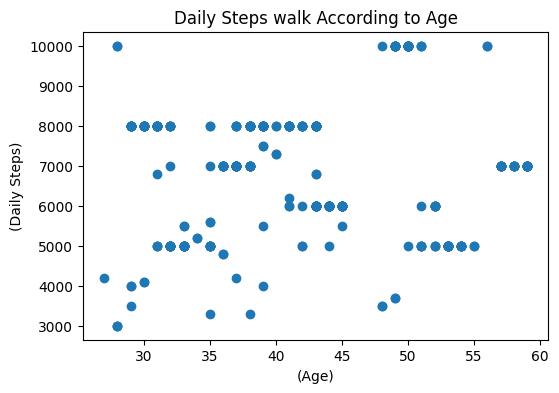

In [72]:
#PLOTTING SCATTERPLOT

fig,ax = plt.subplots(figsize = (6,4))
ax.scatter(df['Age'],df['Daily Steps']) 
ax.set_xlabel('(Age)')
ax.set_ylabel('(Daily Steps)')
ax.set_title('Daily Steps walk According to Age')
plt.show()

In [73]:
#FINDING UPPER,LOWER AND INTER-QUARTILE

Q1=np.percentile(df['Heart Rate'],25,method='midpoint')
Q3=np.percentile(df['Heart Rate'],75,method='midpoint')
IQR= Q3-Q1
print(IQR)
print(Q1)
print(Q3)

4.0
68.0
72.0


In [74]:
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
print(lower)
print(upper)

62.0
78.0


<Axes: ylabel='Heart Rate'>

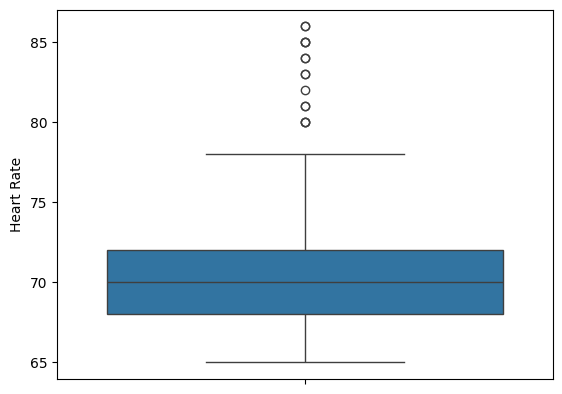

In [75]:
#BOXplot
sns.boxplot(df['Heart Rate'])

Data Visualization With Seaborn

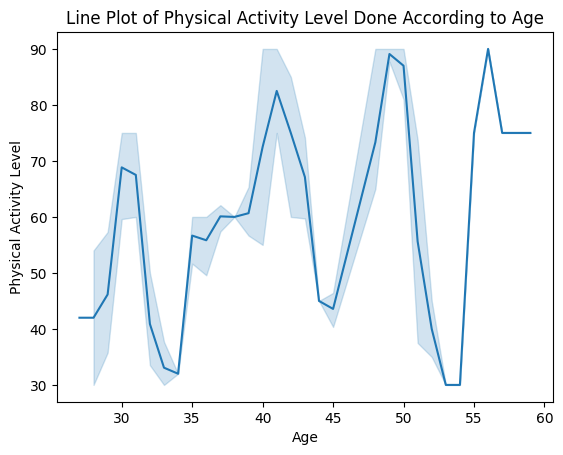

In [76]:
sns.lineplot(x='Age',y='Physical Activity Level',data=df)
plt.title('Line Plot of Physical Activity Level Done According to Age')
plt.show()

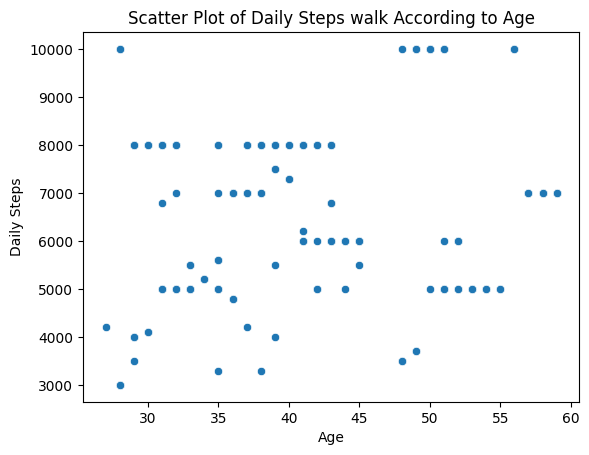

In [77]:
sns.scatterplot(x='Age',y='Daily Steps',data=df)
plt.title("Scatter Plot of Daily Steps walk According to Age")
plt.show()

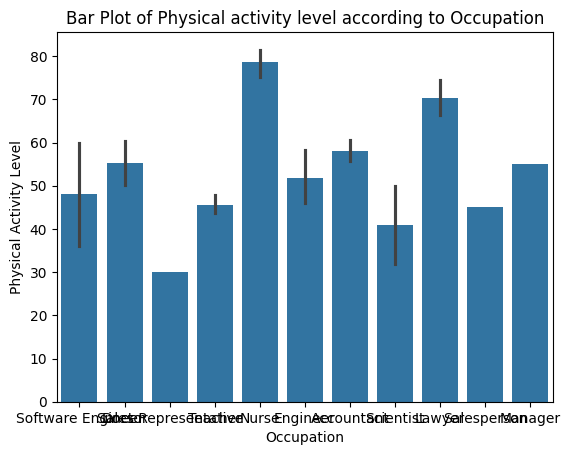

In [78]:
# Bar Plot
sns.barplot(x='Occupation',y='Physical Activity Level',data=df)
plt.title('Bar Plot of Physical activity level according to Occupation')
plt.show()

In [79]:
#df.head()

<Axes: xlabel='Occupation', ylabel='Heart Rate'>

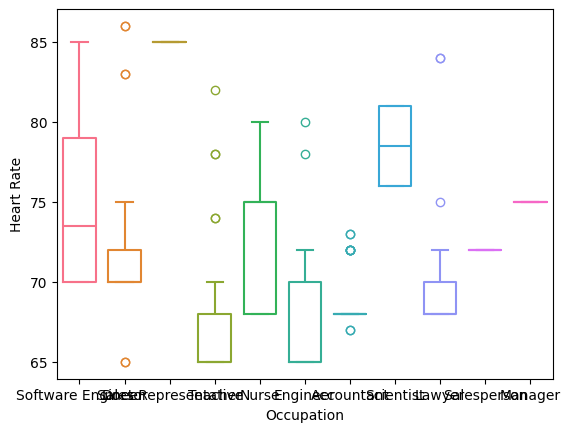

In [96]:
# Box Plot
sns.boxplot(x="Occupation",y='Heart Rate',data=df, hue="Occupation", fill=False, gap=.1)

In [87]:
#filtering

Occupations_of_interest = ['Doctor', 'Nurse', 'Engineer']

# Filter the DataFrame for these specific occupations
df_filtered = df[df['Occupation'].isin(Occupations_of_interest)]

# Display the filtered DataFrame
print(df_filtered)

           Gender  Age Occupation  Sleep Duration  Quality of Sleep  \
Person ID                                                             
2            Male   28     Doctor             6.2                 6   
3            Male   28     Doctor             6.2                 6   
8            Male   29     Doctor             7.8                 7   
9            Male   29     Doctor             7.8                 7   
10           Male   29     Doctor             7.8                 7   
...           ...  ...        ...             ...               ...   
370        Female   59      Nurse             8.1                 9   
371        Female   59      Nurse             8.0                 9   
372        Female   59      Nurse             8.1                 9   
373        Female   59      Nurse             8.1                 9   
374        Female   59      Nurse             8.1                 9   

           Physical Activity Level  Stress Level BMI Category Blood Pressure

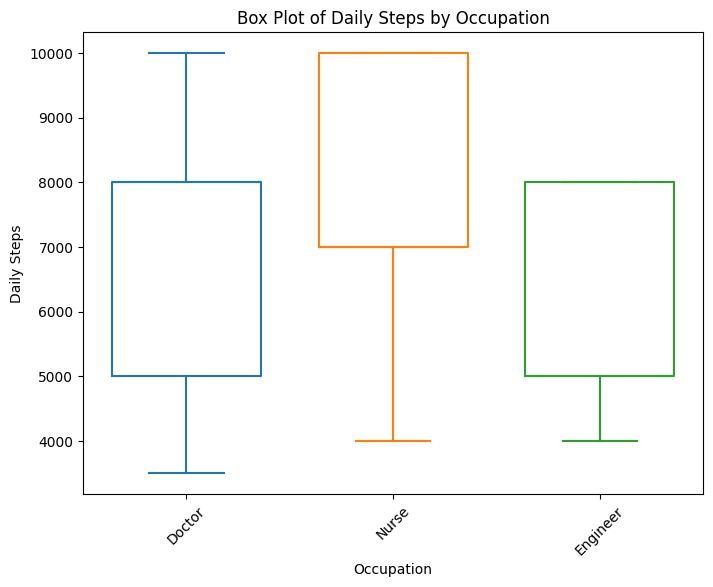

In [94]:
# Create a box plot using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Occupation', y='Daily Steps', data=df_filtered,hue="Occupation", fill=False, gap=.1)
plt.title('Box Plot of Daily Steps by Occupation')
plt.ylabel('Daily Steps')
plt.xlabel('Occupation')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

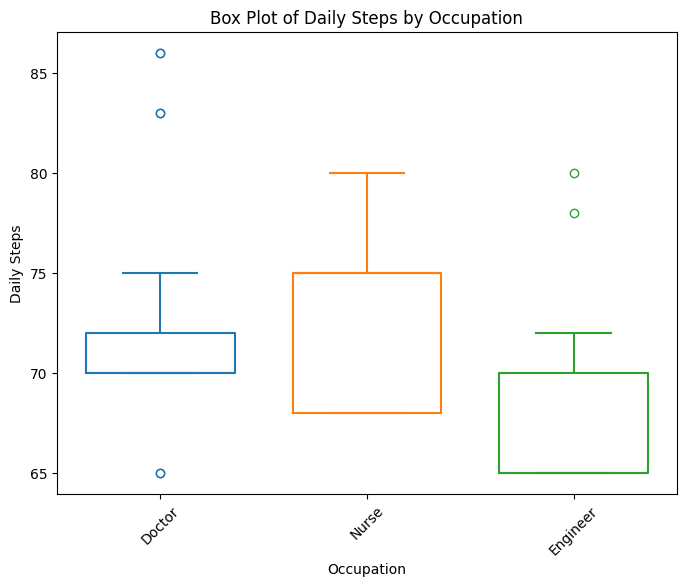

In [97]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Occupation', y='Heart Rate', data=df_filtered,hue="Occupation", fill=False, gap=.1)
plt.title('Box Plot of Daily Steps by Occupation')
plt.ylabel('Daily Steps')
plt.xlabel('Occupation')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

<Axes: xlabel='Occupation', ylabel='Heart Rate'>

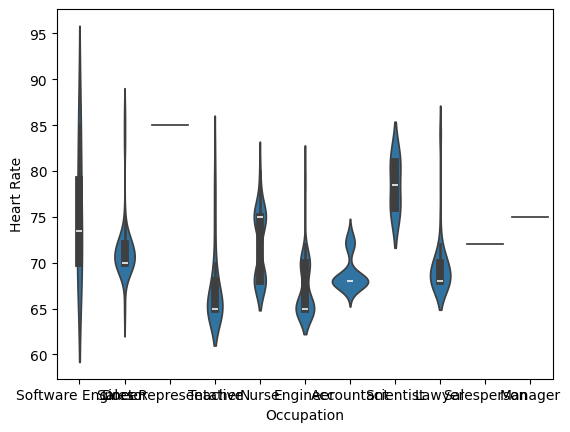

In [83]:
# Violin Plot

sns.violinplot(x='Occupation',y='Heart Rate',data=df)

<Axes: xlabel='Heart Rate', ylabel='Count'>

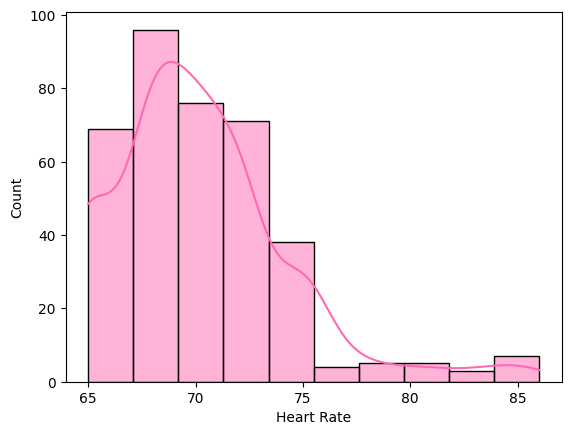

In [119]:
# Histograms, kde=Kernel Density Estimator
sns.histplot(df['Heart Rate'],bins=10, kde=True, color='hotpink')

<Axes: xlabel='Heart Rate', ylabel='Density'>

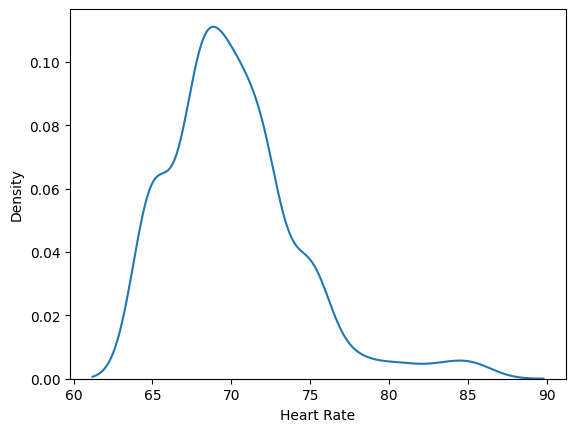

In [103]:
sns.kdeplot(df['Heart Rate'],fill=False)

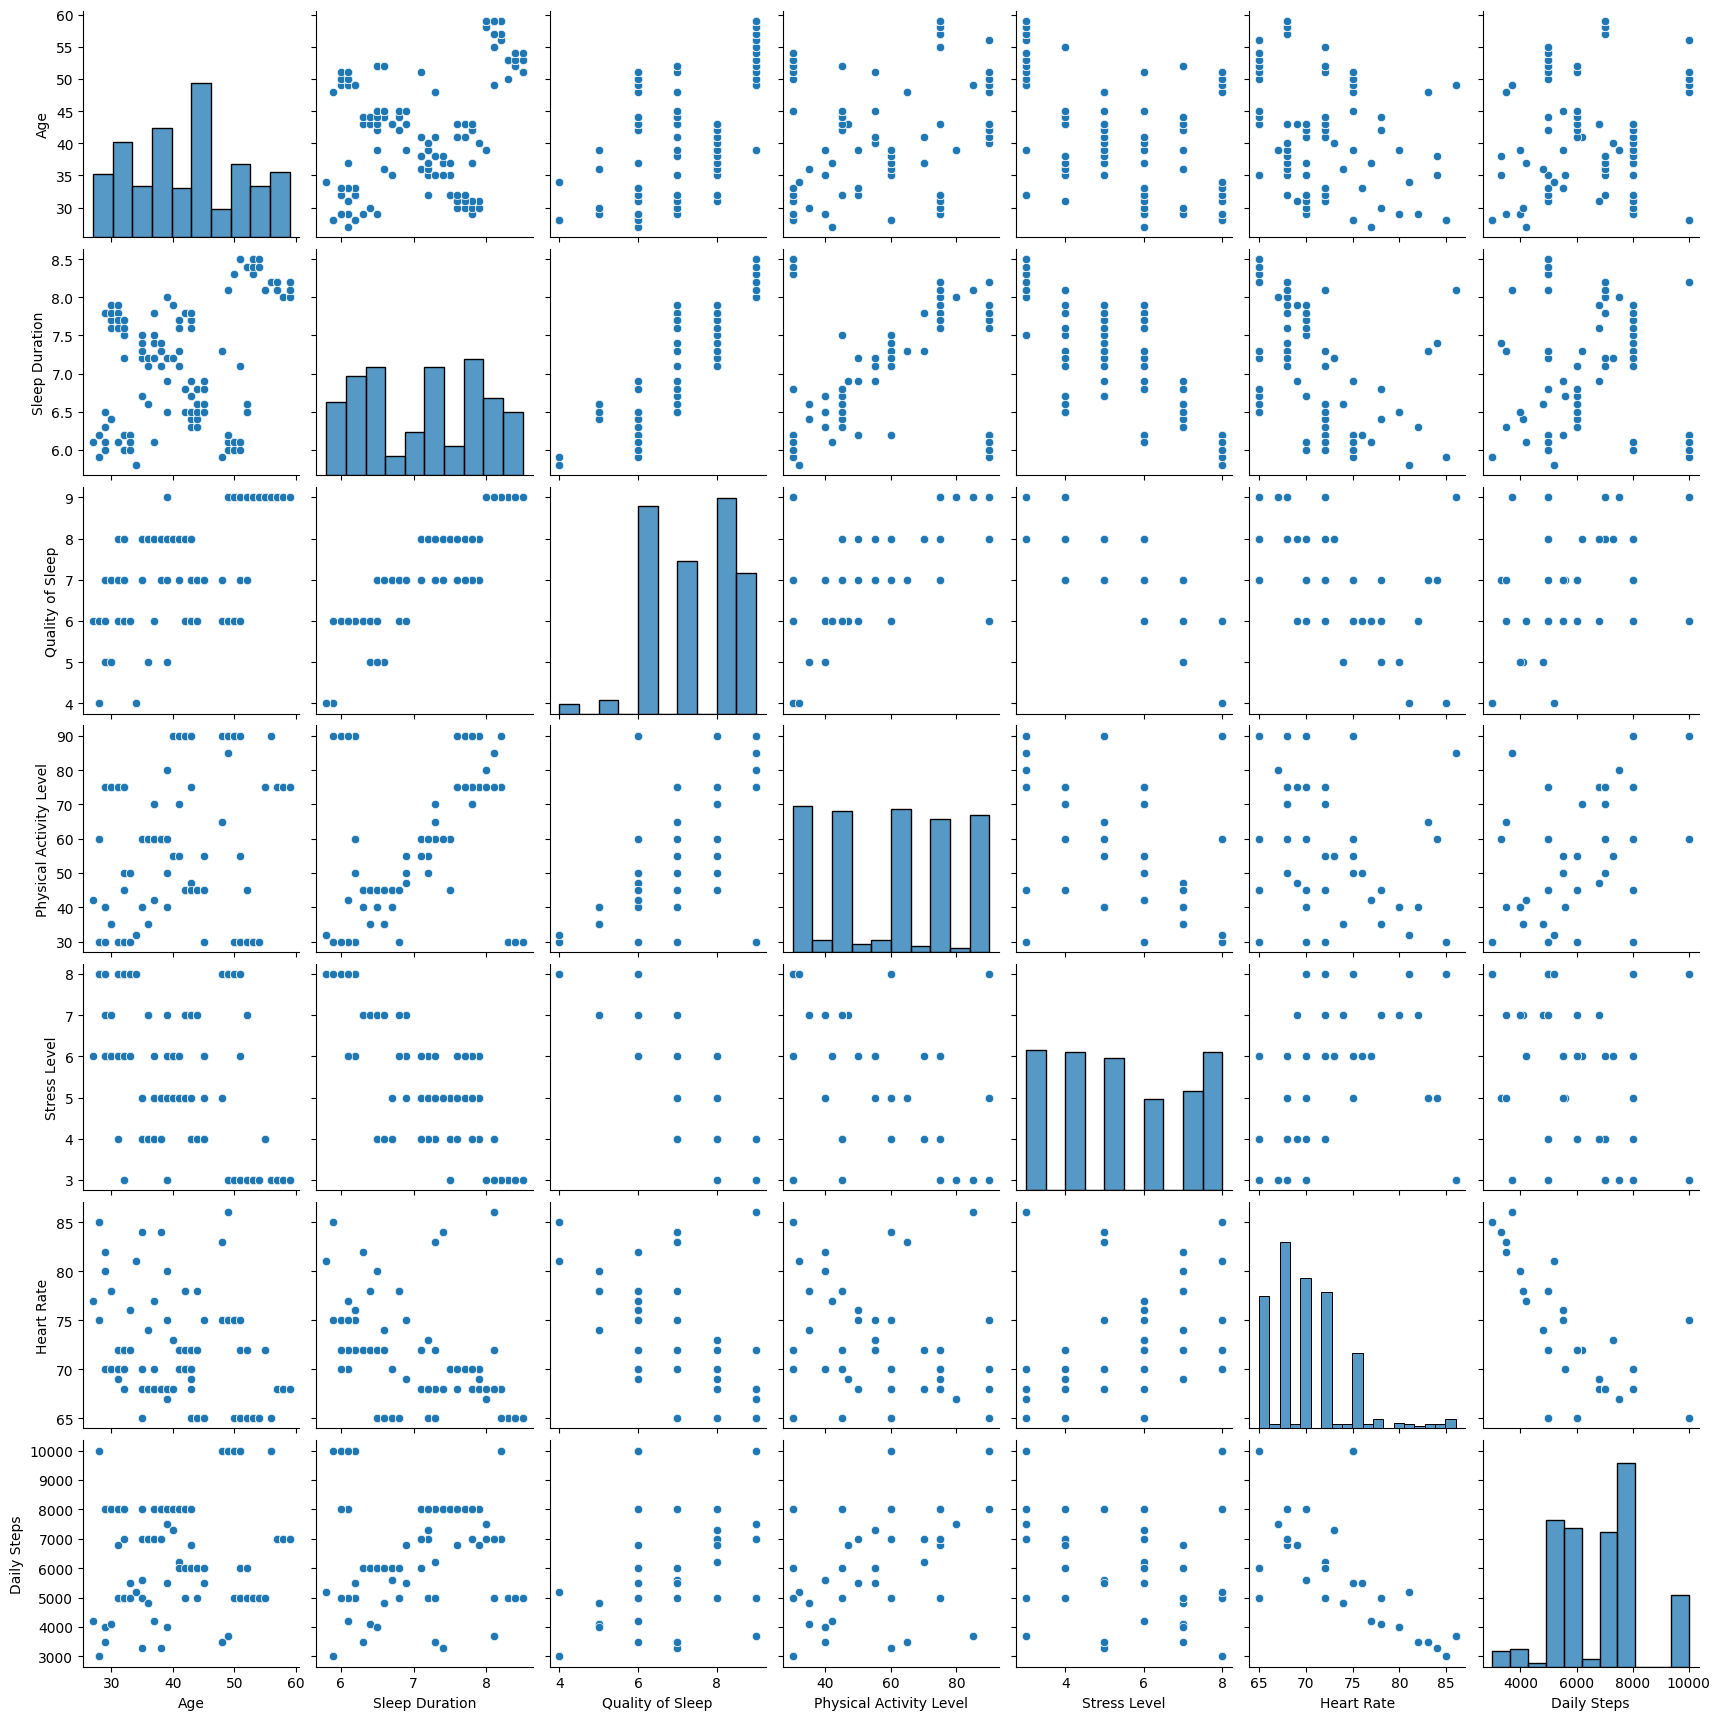

In [105]:
#pairplot
sns.pairplot(df)

In [107]:
# Heatmap
df_corr=df[['Age','Heart Rate','Daily Steps','Stress Level']].corr()
df_corr

,Age,Heart Rate,Daily Steps,Stress Level
Age,1.000000,-0.225606,0.057973,-0.422344
Heart Rate,-0.225606,1.000000,-0.030309,0.670026
Daily Steps,0.057973,-0.030309,1.000000,0.186829
Stress Level,-0.422344,0.670026,0.186829,1.000000


<Axes: >

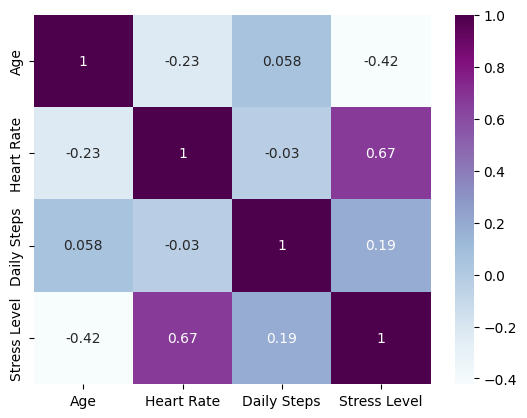

In [127]:
sns.heatmap(df_corr,annot=True,cmap='BuPu')